# Regresion Logistica Titanic

In [71]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')


In [11]:
#Cargamos el dataset 
Datos = pd.read_csv('Titanic-Dataset.csv')

In [12]:
# Realizamos la lectura de datos para el analisis exploratorio 
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
#Describimos los datos 
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


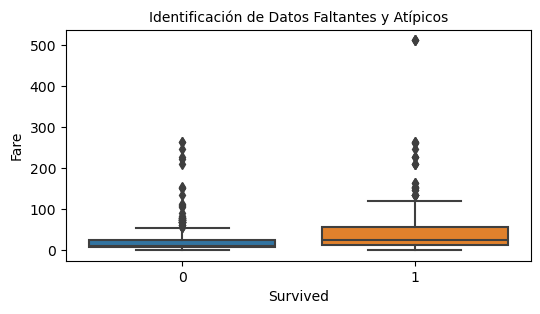

In [26]:
# Identificamos los datos atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Survived'], y=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.show()

# 2. Preprocesamos los datos limpiandolos, tratando valores faltantes y transformandolos segun lo necesitemos 

In [31]:
#Revisamos los datos Fatntates
print("Cantidad de registros con 0 en la edad:", Datos['Age'].isin([0]).sum())
print("Cantidad de registros con 0 en la tarifa:", Datos['Fare'].isin([0]).sum())


Cantidad de registros con 0 en la edad: 0
Cantidad de registros con 0 en la tarifa: 15


In [33]:
#Remplazamos todos los 0 con el valor medio (promedio) de la columna 

# Calcular el promedio de la tarifa  excluyendo los valores de cero
promedio_Fare = Datos[Datos['Fare'] != 0]['Fare'].mean()

# Reemplazar los valores de la tarifa  igual a cero por el promedio calculado
Datos.loc[Datos['Fare'] == 0, 'Fare'] = promedio_Fare


In [36]:
#Revisamos nuevamente los datos faltante 
print("Cantidad de registros con 0 en la edad:", Datos['Age'].isin([0]).sum())
print("Cantidad de registros con 0 en la tarifa:", Datos['Fare'].isin([0]).sum())

Cantidad de registros con 0 en la edad: 0
Cantidad de registros con 0 en la tarifa: 0


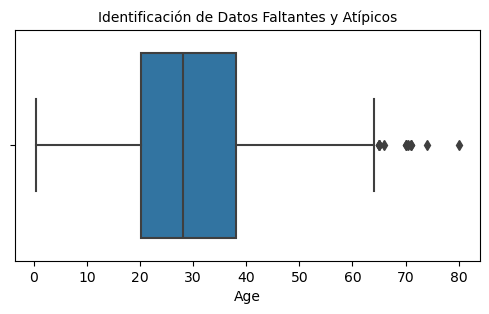

In [39]:
#Identificamos valores atipicos en la edad  

# Convertir los valores no numéricos de 'Age' a NaN
datos_age_numericos = pd.to_numeric(Datos['Age'], errors='coerce')

# Crear un boxplot con todos los datos (numéricos y de texto)
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos_age_numericos)
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.show()


In [50]:
# Definir el rango aceptable para las edades
rango_min = 10
rango_max = 80

# Contar los datos atípicos de Age
datos_atipicos = ((Datos['Age'] < rango_min) | (Datos['Age'] > rango_max)).sum()

print("Cantidad de datos atípicos de Age:", datos_atipicos)


Cantidad de datos atípicos de Age: 62


In [47]:
# Calcular el promedio de las edades
promedio_edad = Datos['Age'].mean()

# Contar la cantidad de valores NaN en la columna 'Age'
cantidad_nan = Datos['Age'].isna().sum()

# Reemplazar los valores NaN en la columna 'Age' por el promedio de las edades
Datos['Age'].fillna(promedio_edad, inplace=True)

# Calcular la cantidad de datos remplazados por el promedio
cantidad_remplazados = cantidad_nan - Datos['Age'].isna().sum()

print("Cantidad de datos remplazados de NaN por el promedio:", cantidad_remplazados)


Cantidad de datos remplazados de NaN por el promedio: 0


In [48]:
# Realizamos nuevamente la lectura de los datos 
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [51]:
#Filtamos los Datos 

Datos=Datos[(Datos['Age']<rango_max)&(Datos['Age']>rango_min)]

In [54]:
#Validamos si se removieron 

Total_Atipicos=((Datos['Age']<rango_min)|(Datos['Age']>rango_max)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [56]:
#Revisamos el tipo de datos y datos faltantes 
Datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  826 non-null    int64  
 1   Survived     826 non-null    int64  
 2   Pclass       826 non-null    int64  
 3   Name         826 non-null    object 
 4   Sex          826 non-null    object 
 5   Age          826 non-null    float64
 6   SibSp        826 non-null    int64  
 7   Parch        826 non-null    int64  
 8   Ticket       826 non-null    object 
 9   Fare         826 non-null    float64
 10  Cabin        193 non-null    object 
 11  Embarked     824 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.9+ KB


# 3 Seleccionamos las caracteristicas mas relevantes para entrenar el modelo utilizando la seleccion de caracteristicas 

In [57]:
# La caracteristica de interes es saber la cantidad de personas que sobrevieron 

# 0 no sobrevivio 1 si sobrevivio 

Datos['Survived'].value_counts()

Survived
0    523
1    303
Name: count, dtype: int64

In [62]:
Datos[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
8,1
9,1
11,1


# 4 Dividimos el data set en train y test para evaluar el modelo 

In [88]:
# Creamos las variables X y Y para almacenar la información del entrenamiento
X = Datos.drop(['Survived','Name','Ticket','Sex','Cabin','Embarked'], axis=1)  # Cargamos los datos de train sin las columnas especificadas
Y = Datos['Survived']  # Cargamos los datos de train solo con la columna Survived

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [89]:
print(X_train)

     PassengerId  Pclass        Age  SibSp  Parch       Fare
437          438       2  24.000000      2      3   18.75000
179          180       3  36.000000      0      0   32.75565
239          240       2  33.000000      0      0   12.27500
65            66       3  29.699118      1      1   15.24580
524          525       3  29.699118      0      0    7.22920
..           ...     ...        ...    ...    ...        ...
615          616       2  24.000000      1      2   65.00000
258          259       1  35.000000      0      0  512.32920
113          114       3  20.000000      1      0    9.82500
745          746       1  70.000000      1      1   71.00000
285          286       3  33.000000      0      0    8.66250

[619 rows x 6 columns]


In [66]:
print (Y_train)

437    1
179    0
239    0
65     1
524    0
      ..
615    1
258    1
113    0
745    0
285    0
Name: Survived, Length: 619, dtype: int64


# 5. Entrenar el modelo Configurando los dirferenctes Hiperparámetros



In [90]:
# Construimos el modelo de regresion Logistica
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

# Creamos el modelo de prediccion
Prediccion=modelo_regresion.predict(X_test)

In [91]:
print (Y_test)

854    0
429    1
662    0
452    0
500    0
      ..
648    0
313    0
486    1
731    0
422    0
Name: Survived, Length: 207, dtype: int64


In [92]:
print (Prediccion)

[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0]


# 6 Evaluamos el desempeño del modelo conjunto de Test con metricas como precision, recall f1-score 

In [94]:
# Desempeño del modelo de regresio logistica 
print (classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       131
           1       0.67      0.49      0.56        76

    accuracy                           0.72       207
   macro avg       0.71      0.67      0.68       207
weighted avg       0.72      0.72      0.71       207



# 7 Realizamos las diferentes graficas que permiten visualixza<r los resultados del modelo 

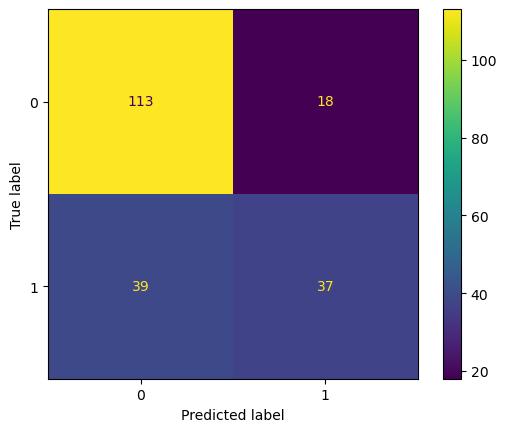

In [96]:
# Matrix de Confusion del modelo 
cm=confusion_matrix(Y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

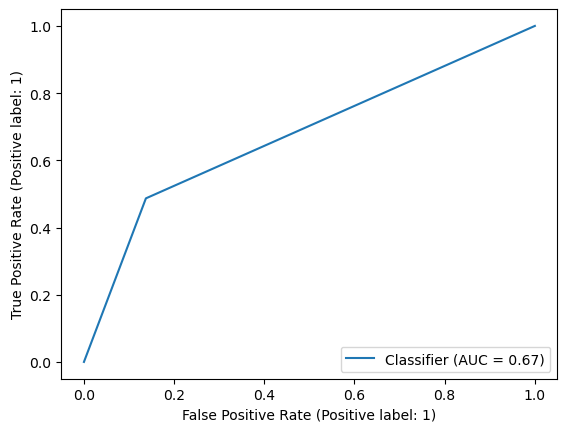

In [98]:
#Curva de precision de modelo 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()